## PES inference from preoptimized qauntum surrogate circuit
- 4 qubits system for H2 molecule
- PQC with D=6

In [1]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### Set calculation conditions (Do not change) 

In [2]:
# Do not change the following parameters

num_qubits = 4 # number of qubits, n_qubits
reps_pqc = 6   # Depth of PQC, D
reps = 2       # number of block PQC layer of HQCNN

### Read the optimized parameters for n_qubits=4 and D=6

In [3]:
filename = './opt_params/singlet.pickle' 

with open(filename, 'rb') as f:
    opt_params = pickle.load(f)
    f.close()

In [4]:
opt_params

array([-3.52417174e-01,  8.67797007e-01,  2.26691918e-01,  1.64020741e+00,
        7.12747347e-01,  6.37117807e-01, -2.91185572e-01,  4.65654129e-02,
        6.22229851e-01, -4.77623306e-01,  1.19689531e+00, -3.61561420e-01,
        2.05838303e-01, -8.23627189e-02,  7.63149562e-01,  1.03915017e+00,
        6.70164927e-01,  4.43180300e-01,  1.50562155e-01,  4.61872142e-01,
        7.98651623e-01,  8.34499222e-01,  6.81020021e-01,  6.12528254e-01,
        2.26925483e+00,  1.57100275e+00,  1.57085465e+00, -2.26108664e-04,
       -2.90928322e-01,  6.94765726e-01, -5.07331190e-04,  5.01437035e-01,
        1.57079796e+00,  1.76676804e+00, -4.51499331e-04,  6.95146159e-01,
       -1.25592456e-04,  5.51210202e-03,  1.04479370e-01,  1.57071130e+00,
        8.71376560e-01,  4.12856849e-04, -3.94654984e-04,  1.11021183e+00,
        1.57052652e+00,  1.57040519e+00,  3.62995276e-04,  4.27239670e-04])

### Make test dataset

In [5]:
def make_testdata(r_min, r_max, data_num):
    X_test = []
    _r = np.linspace(r_min, r_max, data_num)

    for i in range(data_num):
        X_test.append([_r[i], 0, 0])

    return X_test

In [6]:
X_min = 0.45
X_max = 3.0
num_test_data = 30

X_test = make_testdata(X_min, X_max, num_test_data)

### PES inference

In [7]:
from sub.pqc import QNNcircuit0, QNNcircuit1, QNNcircuit2
from sub.utils import get_qubit_hamiltonian_of_H2
from sub.utils import expval

In [8]:
gs_eng = [] 
ex1_eng = [] 
ex2_eng = []

for i in tqdm(range(len(X_test))):
    
    # ground state
    qc0 = QNNcircuit0(num_qubits,
                      X_test[i],
                      reps_pqc,
                      reps,
                      opt_params)
    
    # 1st excited state
    qc1 = QNNcircuit1(num_qubits,
                      X_test[i],
                      reps_pqc,
                      reps,
                      opt_params)
    
    # 2nd excited state
    qc2 = QNNcircuit2(num_qubits,
                      X_test[i],
                      reps_pqc,
                      reps,
                      opt_params)
    
    # qubit hamiltonian at each bond length
    hamil = get_qubit_hamiltonian_of_H2(X_test[i])[0]
    
    gs_eng.append(expval(hamil, qc0))   # energy inference for ground state
    ex1_eng.append(expval(hamil, qc1))  # energy inference for 1st excited state
    ex2_eng.append(expval(hamil, qc2))  # energy inference for 2nd excited state

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.17it/s]


### Plot results

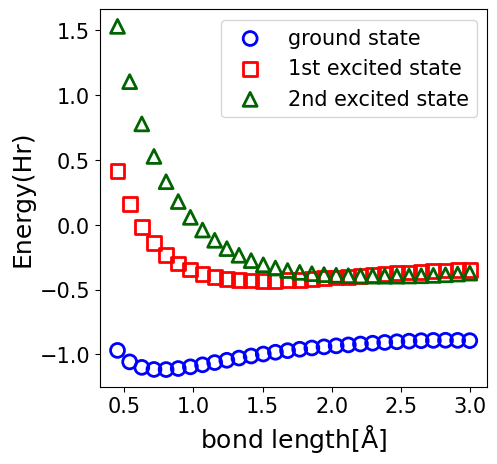

In [9]:
plt.figure(figsize=(5, 5), dpi=100)

x = []
for i in range(len(X_test)):
    x.append(X_test[i][0])

plt.scatter(x,gs_eng, s=100,marker='o',facecolor='None', edgecolors='blue',label='ground state',lw=2)  
plt.scatter(x,ex1_eng, s=100,marker='s',facecolor='None', edgecolors='red',label='1st excited state',lw=2)
plt.scatter(x,ex2_eng, s=100,marker='^',facecolor='None', edgecolors='darkgreen',label='2nd excited state',lw=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.xlabel(
    'bond length[$\mathrm{\AA}$]',
    fontsize=18,
)
plt.ylabel('Energy(Hr)', fontsize=18)

plt.show()

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table